In [8]:
import numpy as np 
import pandas as pd
import neattext.functions as nfx
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import BatchNormalization, LSTM, Dropout, GlobalMaxPooling1D, Embedding, Input, Dense
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tqdm import tqdm
import pickle

tf.config.list_physical_devices('GPU')

[]

In [9]:
data=pd.read_csv('../dataset/Suicide_Detection.csv')

In [10]:
data


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide
...,...,...,...
232069,348103,If you don't like rock then your not going to ...,non-suicide
232070,348106,You how you can tell i have so many friends an...,non-suicide
232071,348107,pee probably tastes like salty tea😏💦‼️ can som...,non-suicide
232072,348108,The usual stuff you find hereI'm not posting t...,suicide


In [3]:
data.shape

(232074, 3)

In [4]:
train_data,test_data=train_test_split(data,test_size=0.2,random_state=np.random.randint(10))

In [5]:
def clean_text(text):
    text_length=[]
    cleaned_text=[]
    for str in tqdm(text):
        str=str.lower()
        str=nfx.remove_emails(str)
        str=nfx.remove_urls(str)
        str=nfx.remove_special_characters(str)
        str=nfx.remove_stopwords(str)
        text_length.append(len(str.split()))
        cleaned_text.append(str)
    return cleaned_text,text_length

In [6]:
cleaned_train_text, train_text_length = clean_text(train_data.text)
cleaned_test_text, test_text_length = clean_text(test_data.text)

100%|██████████| 46415/46415 [00:06<00:00, 6952.79it/s] 


In [13]:
cleaned_test_text

['pettition google doodle national mens day know nmd yesterday pettition google doodle id like yalls help girl know feels like things equal want change currently overlooked equality doesnt count taken extreme direction small need yalls help bigger heres link',
 'thank allthank kind people helped dark time ot 10th grade life pointless like taking life best way feel happy im glad took tips suggested awesome people rsuicidewatch found girlfriend incredible person life happy feel happy accepted grateful guys probably wouldnt college',
 'dont wan slp 1 rn cafen needed',
 'guys anthony fauci turned 80 whos celebratory jack session',
 'im doneokay title suggest recently decided wouldnt seek easy opportunity came considering taking wishes monday school secrets chest life right',
 'catholicism strangest thing ive seen apparently baptize baptism removes sin including original sin priests confession confession removes sins baptized youre better unbaptized baptize rely priest confession rites cath

In [7]:
tokenizer=Tokenizer(num_words=170428)
tokenizer.fit_on_texts(cleaned_train_text)

word_frequency = pd.DataFrame(tokenizer.word_counts.items(),columns=['word','count']).sort_values(by='count',ascending=False)
print(word_frequency[:5])

    word   count
0     im  261413
72  dont  170270
86  like  144153
66  want  118993
17  know  104034


In [9]:
tokenizer.word_index

{'im': 1,
 'dont': 2,
 'like': 3,
 'want': 4,
 'know': 5,
 'feel': 6,
 'life': 7,
 'ive': 8,
 'cant': 9,
 'people': 10,
 'time': 11,
 'think': 12,
 'going': 13,
 'friends': 14,
 'day': 15,
 'help': 16,
 'years': 17,
 'filler': 18,
 'things': 19,
 'got': 20,
 'good': 21,
 'fucking': 22,
 'school': 23,
 'way': 24,
 'anymore': 25,
 'need': 26,
 'didnt': 27,
 'family': 28,
 'better': 29,
 'die': 30,
 'end': 31,
 'love': 32,
 'talk': 33,
 'live': 34,
 'kill': 35,
 'fuck': 36,
 'year': 37,
 'ill': 38,
 'suicide': 39,
 'right': 40,
 'hate': 41,
 'shit': 42,
 'work': 43,
 'thing': 44,
 'bad': 45,
 'parents': 46,
 'person': 47,
 'told': 48,
 'friend': 49,
 'thats': 50,
 'care': 51,
 'tell': 52,
 'thought': 53,
 'said': 54,
 'point': 55,
 'doesnt': 56,
 'tried': 57,
 'getting': 58,
 'try': 59,
 'happy': 60,
 'job': 61,
 'long': 62,
 'feeling': 63,
 'mom': 64,
 'away': 65,
 'find': 66,
 'trying': 67,
 'lot': 68,
 'wanted': 69,
 'pain': 70,
 'started': 71,
 'best': 72,
 'tired': 73,
 'hard': 74,
 

# Process Text For the Model

In [11]:
train_text_seq= tokenizer.texts_to_sequences(cleaned_train_text)
train_text_pad= pad_sequences(train_text_seq,maxlen=100)

test_text_seq= tokenizer.texts_to_sequences(cleaned_test_text)
test_text_pad= pad_sequences(test_text_seq,maxlen=100)

In [14]:
train_text_seq

[[1,
  7685,
  248,
  5552,
  751,
  168,
  101,
  2859,
  8179,
  1062,
  10394,
  373,
  665,
  2528,
  21,
  665,
  87369,
  87370,
  5,
  477,
  115,
  447,
  1117,
  1773,
  679,
  318,
  122,
  477,
  500,
  1993,
  194,
  929,
  1653,
  5552],
 [57,
  35331,
  79,
  11,
  8,
  5553,
  74,
  18,
  87371,
  176,
  103,
  18,
  6596,
  2455,
  3817,
  223,
  315,
  6975,
  7248,
  13131,
  8,
  3288,
  39,
  18,
  50,
  303,
  86,
  277,
  8323,
  249,
  58,
  5121,
  152,
  23,
  1,
  168,
  54,
  7,
  594,
  326,
  4,
  33,
  802,
  86,
  65,
  88,
  1246],
 [2,
  4,
  6,
  25602,
  2179,
  28,
  500,
  14,
  2,
  4,
  25,
  1,
  72,
  85,
  80,
  826,
  74,
  2,
  5,
  43,
  633,
  78,
  3,
  22,
  41,
  22935,
  78,
  47090,
  22,
  125,
  5,
  1275,
  1314,
  36,
  41,
  91,
  41,
  503,
  19,
  13,
  78,
  971,
  2151,
  41,
  87,
  143,
  994,
  92,
  123,
  256,
  1751,
  946],
 [173,
  805,
  1553,
  23,
  8729,
  14493,
  6976,
  157,
  995,
  40022,
  2,
  3110,
  3,
  7

In [12]:
cleaned_train_text

['im litterally crying nostalgia rn looking old spotify playlists played classical music song plays good song nuvole bianche know piece look trust wonderful remembered listening ready sleep piece amazing hits different level wow nostalgia',
 'point helpsive suicidal time ive battled depression years climaxjng girlfriend 2 years dumping incident swallowed god knows advil downed tequila ive fantasizing suicide years care etc thoughts coming rampant face getting expelled high school im looking tell life beautiful miss want talk hopefully thoughts away actually balls',
 'dont want feel anymorefuck greatest family amazing friends dont want anymore im tired living maybe covid depression dont know shit happening world like fucking hate thsi world everythjng fucking money know obvious answers fuck hate thinking hate watching things going world letting rip hate wish death soul left wanna wake drowning weed',
 'whats favorite subject school excluding electives mines close math sciencei dont rly 

In [11]:
lbl_target=LabelEncoder()
train_output=lbl_target.fit_transform(train_data['class'])
test_output=lbl_target.transform(test_data['class'])

# Embedding Model 

In [15]:
with open('../dataset/glove.840B.300d.pkl', 'rb') as fp:
    glove = pickle.load(fp)

In [17]:
dataset_length=len(tokenizer.word_index) + 1

embedding_matrix=np.zeros((dataset_length,300), dtype=float) #pad 0 to prep the matrix to match with the shape of our dataset
for word,i in tokenizer.word_index.items():
    num = glove.get(word)
    if num is not None:
        embedding_matrix[i] = num

# Model Building

In [14]:
model=tf.keras.models.Sequential()
model.add(Input(shape=(100,)))
model.add(Embedding(dataset_length,300,weights=[embedding_matrix],trainable=False))
model.add(LSTM(20,return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dense(200,activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer=keras.optimizers.SGD(0.01,momentum=0.09),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          78603600  
                                                                 
 lstm (LSTM)                 (None, 100, 20)           25680     
                                                                 
 global_max_pooling1d (Globa  (None, 20)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 200)               4200      
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 78,633,681
Trainable params: 30,081
Non-trainable params: 78,603,600
_______________________________________

In [15]:
early_break = EarlyStopping(monitor='loss', patience=5)
reduce_learning_rate = ReduceLROnPlateau(patience=3)

result=model.fit(train_text_pad,train_output,validation_data=(test_text_pad,test_output),
            epochs=20,batch_size=200,callbacks=[early_break,reduce_learning_rate])

Epoch 1/20
929/929 [==============================] - 50s 53ms/step - loss: 0.5166 - accuracy: 0.7870 - val_loss: 0.3497 - val_accuracy: 0.8677 - lr: 0.0100
Epoch 2/20
929/929 [==============================] - 50s 54ms/step - loss: 0.3044 - accuracy: 0.8827 - val_loss: 0.3044 - val_accuracy: 0.8767 - lr: 0.0100
Epoch 3/20
929/929 [==============================] - 49s 53ms/step - loss: 0.2696 - accuracy: 0.8946 - val_loss: 0.2565 - val_accuracy: 0.9003 - lr: 0.0100
Epoch 4/20
929/929 [==============================] - 48s 52ms/step - loss: 0.2540 - accuracy: 0.9009 - val_loss: 0.2400 - val_accuracy: 0.9066 - lr: 0.0100
Epoch 5/20
929/929 [==============================] - 45s 49ms/step - loss: 0.2436 - accuracy: 0.9046 - val_loss: 0.2340 - val_accuracy: 0.9087 - lr: 0.0100
Epoch 6/20
929/929 [==============================] - 45s 48ms/step - loss: 0.2365 - accuracy: 0.9078 - val_loss: 0.2387 - val_accuracy: 0.9061 - lr: 0.0100
Epoch 7/20
929/929 [==============================] - 45s 

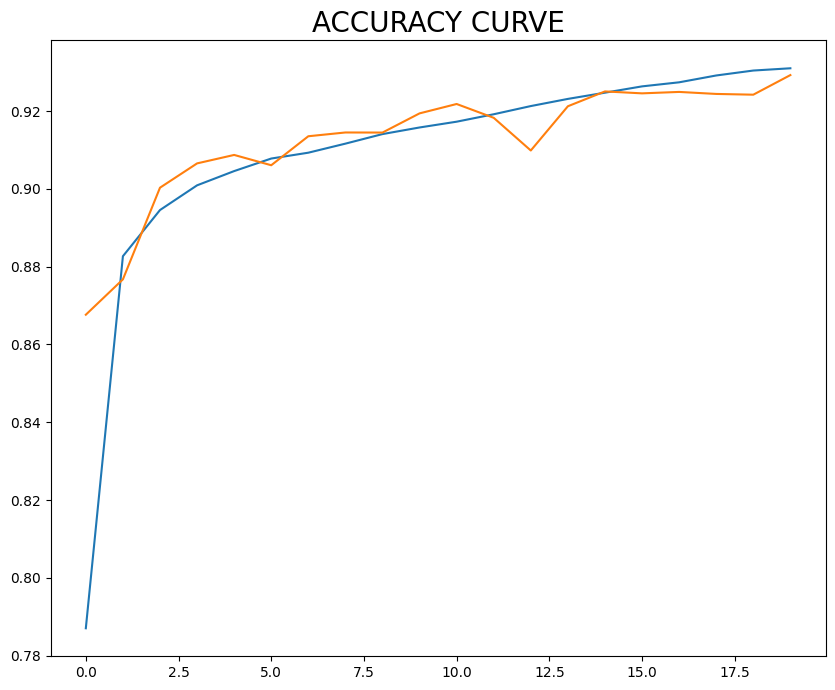

In [16]:
plt.figure(figsize=(10,8))
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('ACCURACY CURVE',fontdict={'size':20})
plt.show()

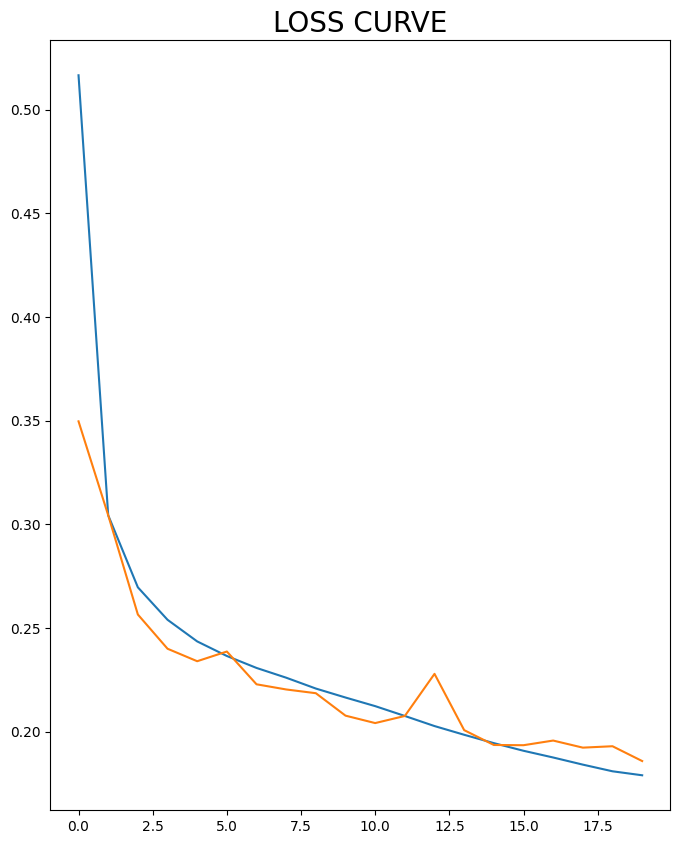

In [17]:
plt.figure(figsize=(8,10))
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('LOSS CURVE',fontdict={'size':20})
plt.show()

In [18]:
model.evaluate(test_text_pad, test_output)

1451/1451 [==============================] - 12s 8ms/step - loss: 0.1859 - accuracy: 0.9293


[0.18587173521518707, 0.9292685389518738]

In [19]:
model.save('./model',overwrite=True)

INFO:tensorflow:Assets written to: ./model\assets


INFO:tensorflow:Assets written to: ./model\assets
